In [68]:
#Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Warnings
import warnings

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Color output
from termcolor import colored

# Datetime
import datetime

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

print('\nAll libraries imported succesfully')


All libraries imported succesfully


In [69]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a featur
pd.options.mode.copy_on_write = True

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings

print('\nAll libraries configed succesfully')


All libraries configed succesfully


Importing Data

In [70]:
# Input train data
Train = pd.read_csv('/content/train.csv (1).xls')
Train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [71]:
# Input test data
Test = pd.read_csv('/content/test.csv (1).xls')
Test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


 Data Informations

In [72]:
# Describe
Train.describe().loc[['min', 'mean', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis=1)

,min,mean,25%,50%,75%,max
battery_power,501.000000,1238.518500,851.750000,1226.000000,1615.250000,1998.000000
blue,0.000000,0.495000,0.000000,0.000000,1.000000,1.000000
clock_speed,0.500000,1.522250,0.700000,1.500000,2.200000,3.000000
dual_sim,0.000000,0.509500,0.000000,1.000000,1.000000,1.000000
fc,0.000000,4.309500,1.000000,3.000000,7.000000,19.000000
four_g,0.000000,0.521500,0.000000,1.000000,1.000000,1.000000
int_memory,2.000000,32.046500,16.000000,32.000000,48.000000,64.000000
m_dep,0.100000,0.501750,0.200000,0.500000,0.800000,1.000000
mobile_wt,80.000000,140.249000,109.000000,141.000000,170.000000,200.000000
n_cores,1.000000,4.520500,3.000000,4.000000,7.000000,8.000000


In [73]:
# Train Information
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

visualizations Plots

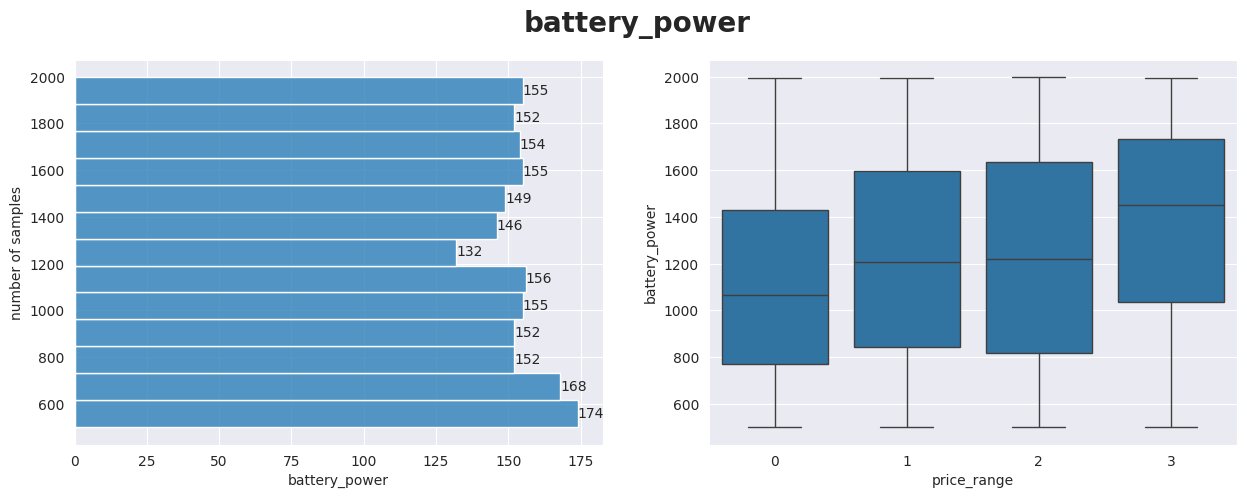

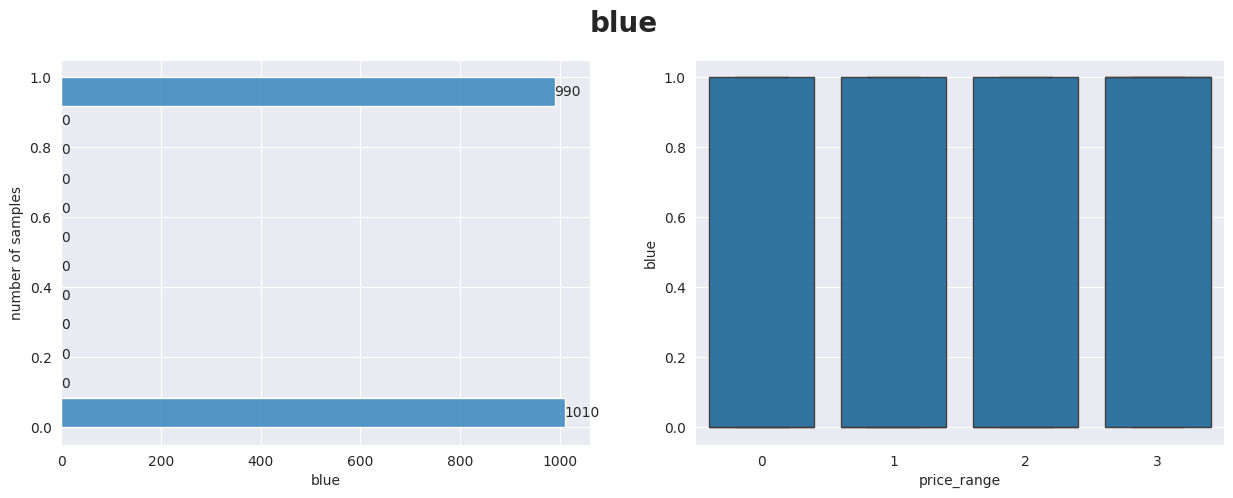

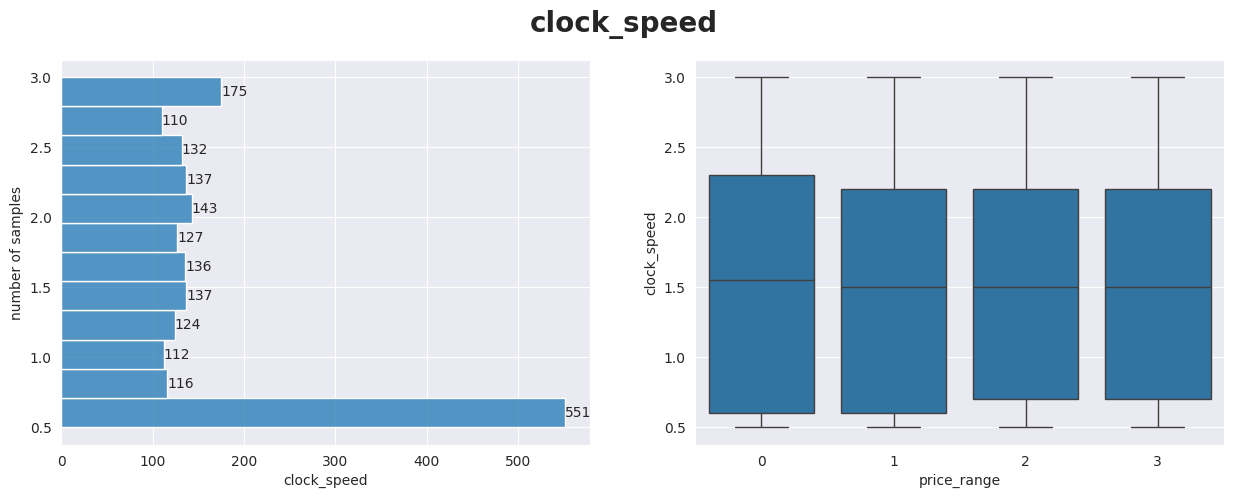

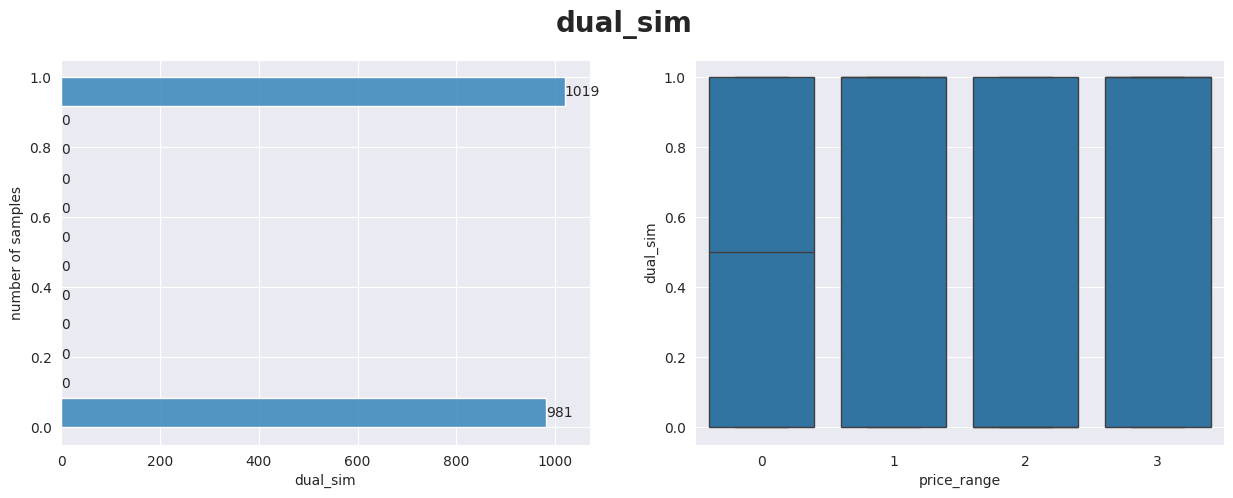

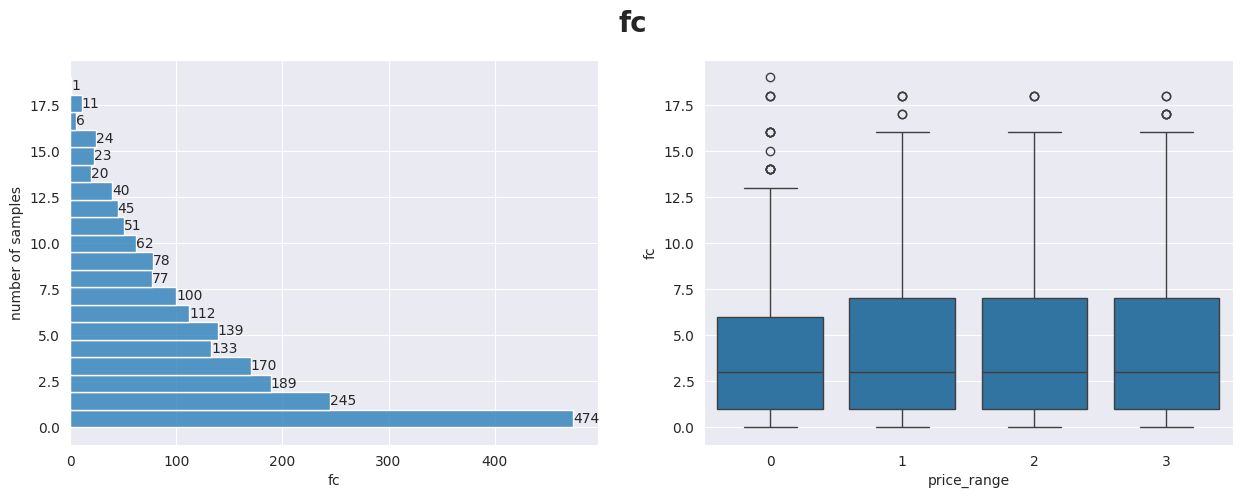

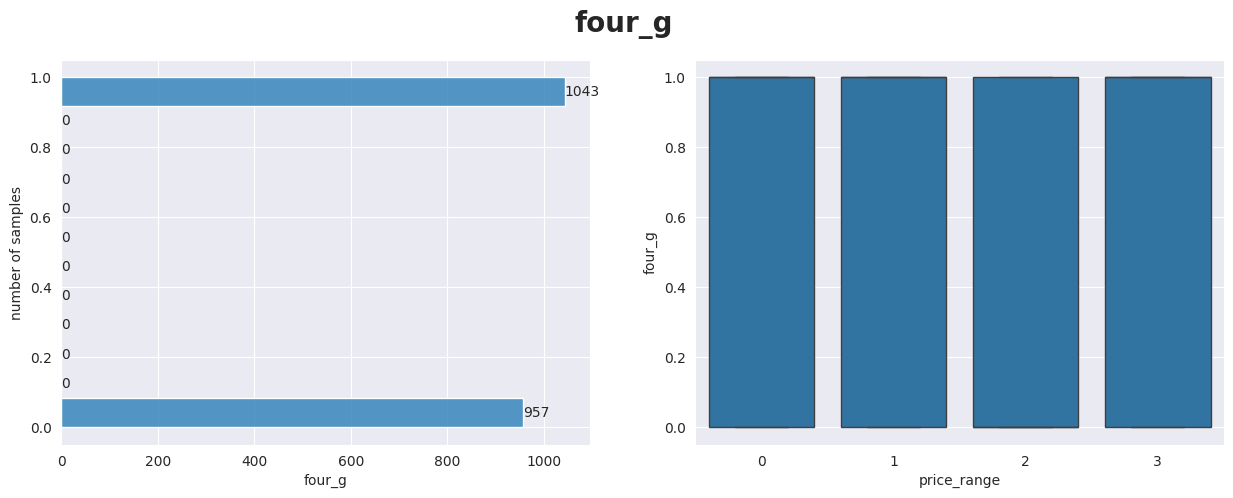

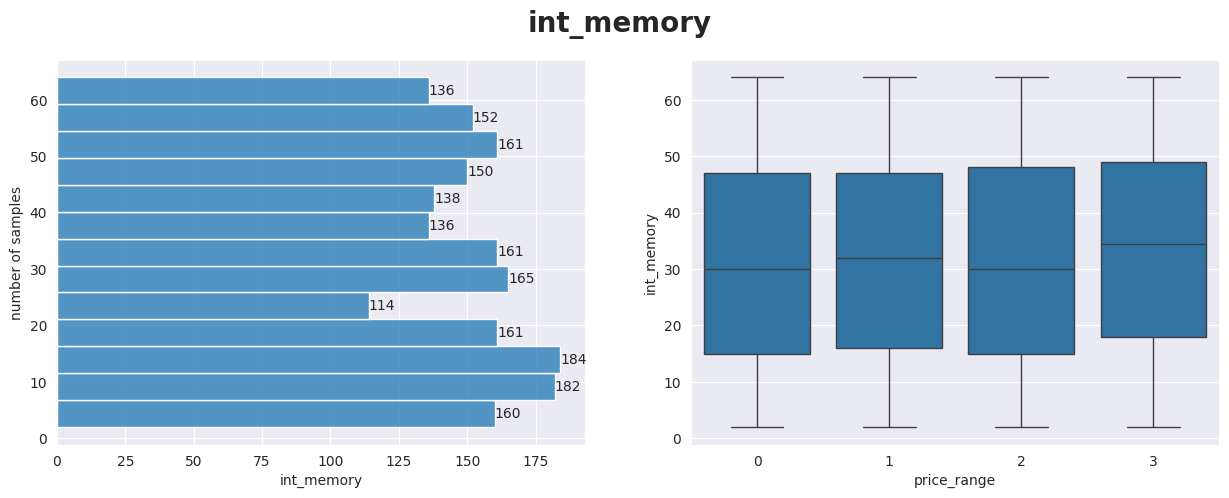

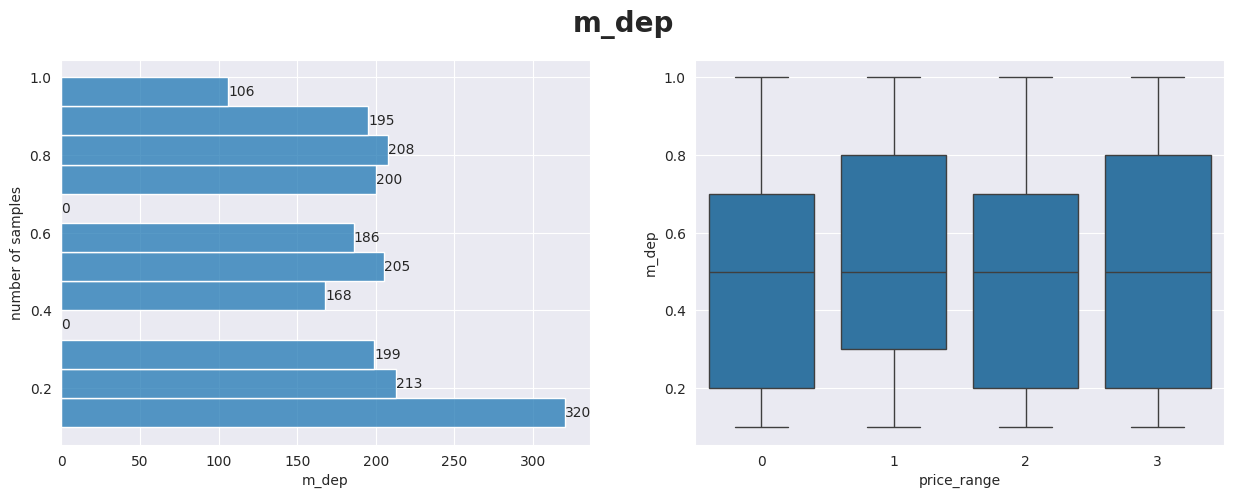

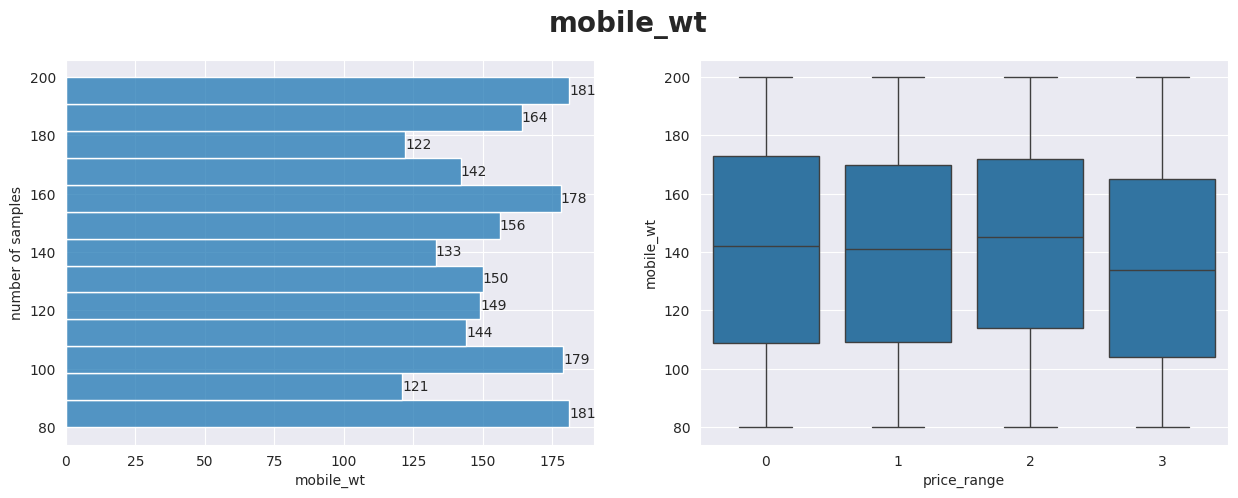

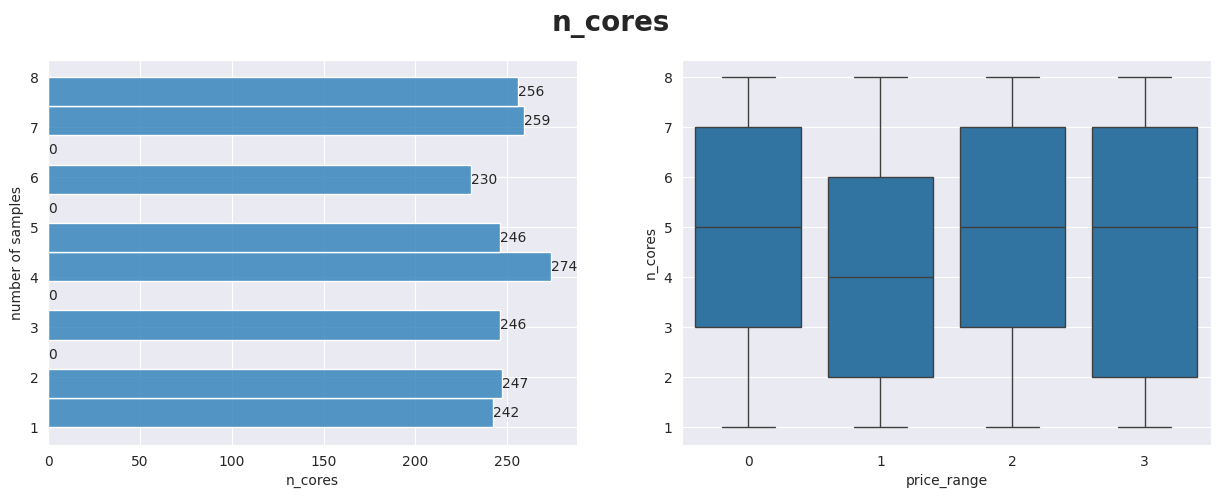

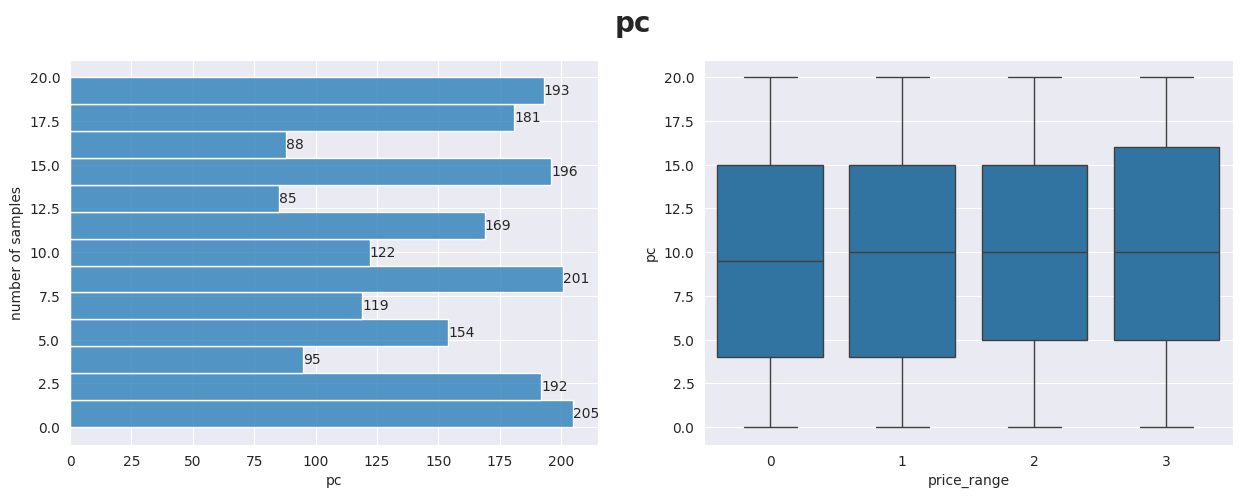

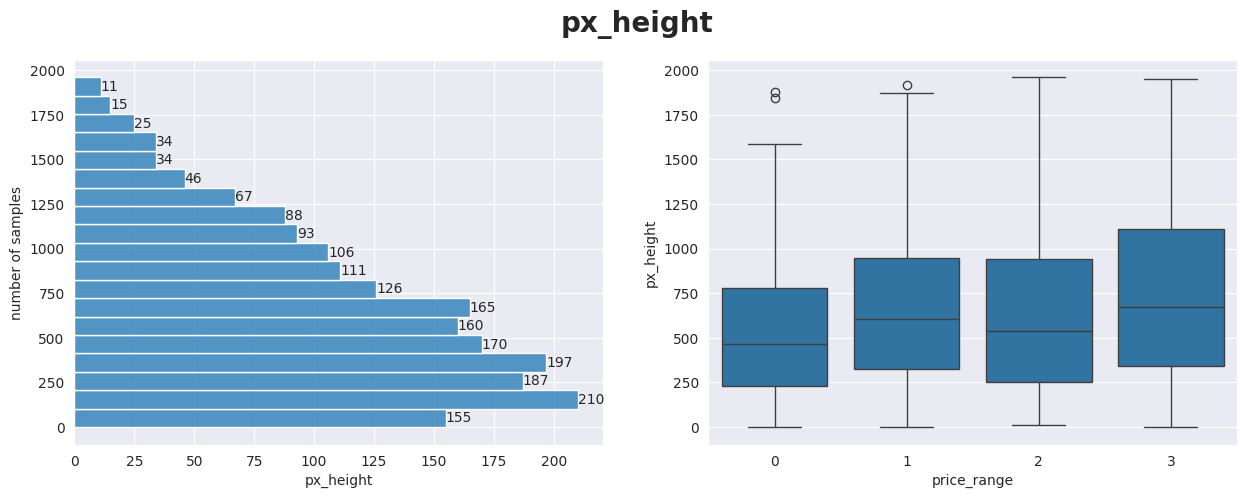

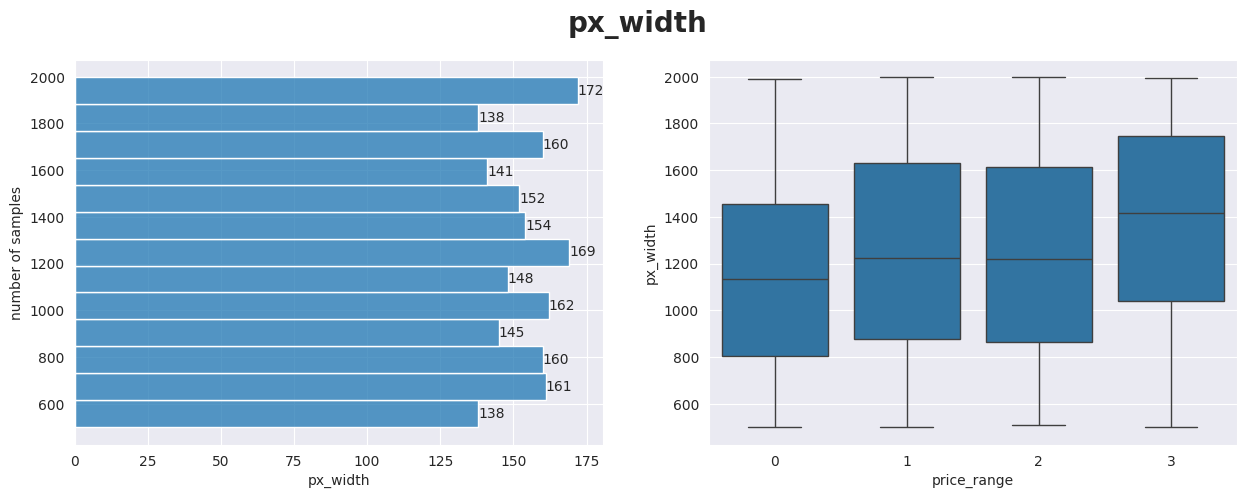

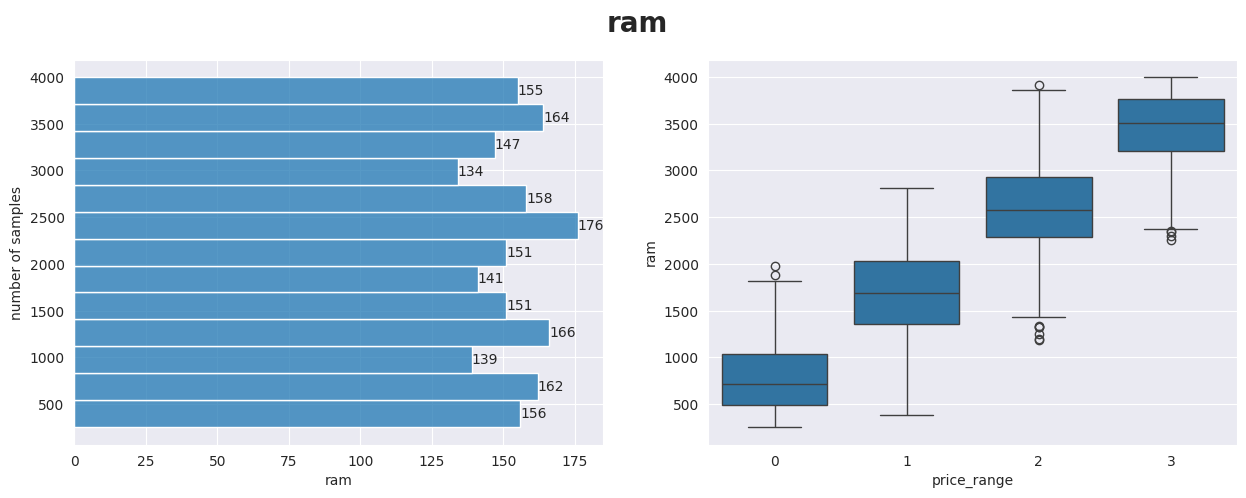

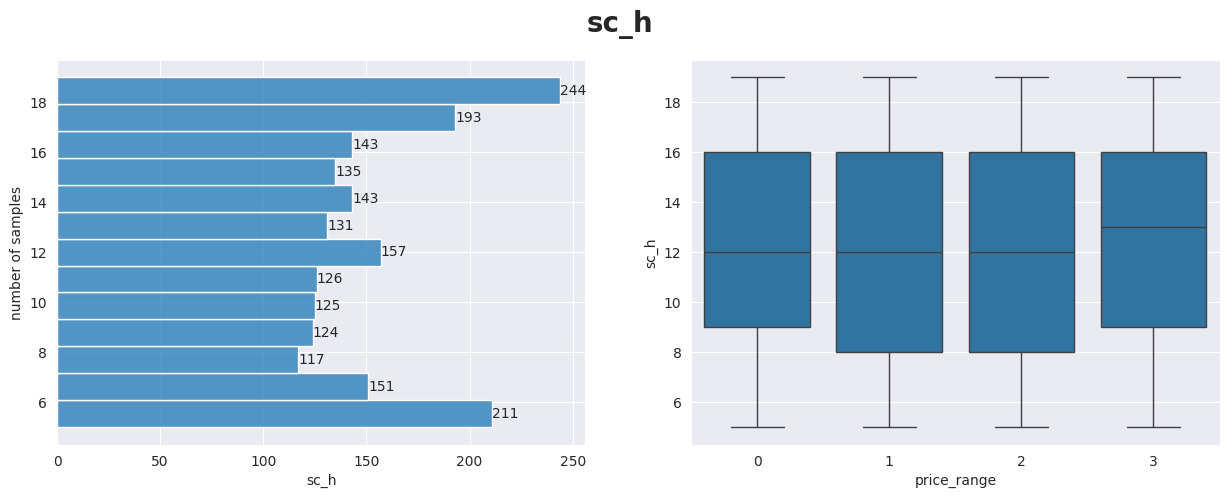

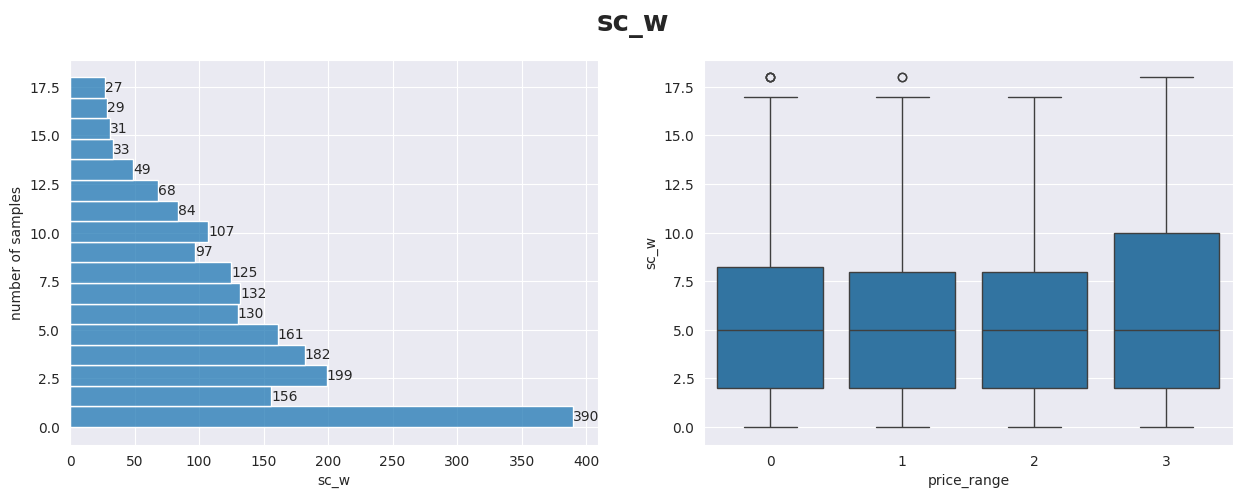

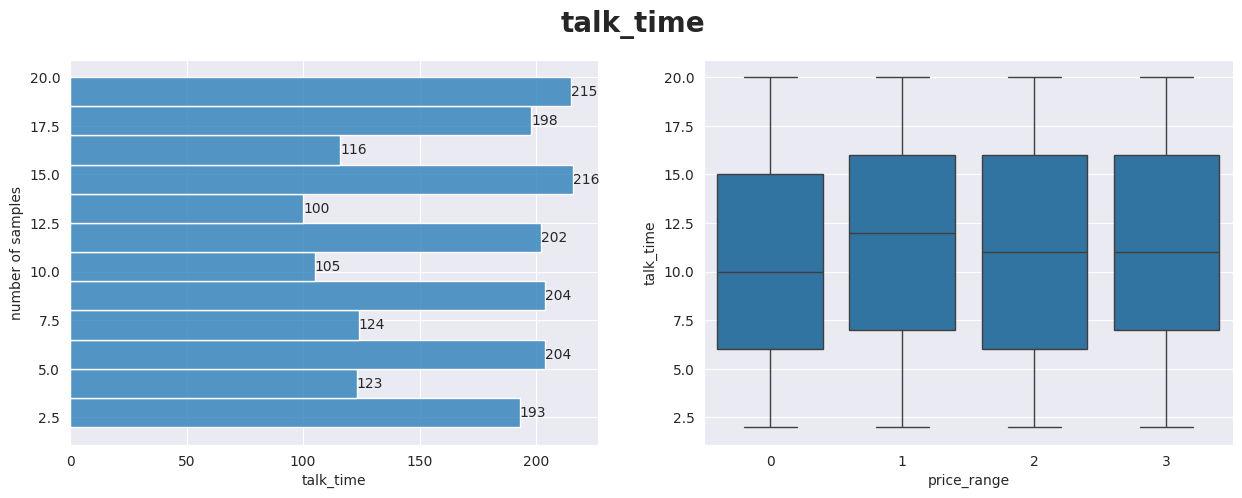

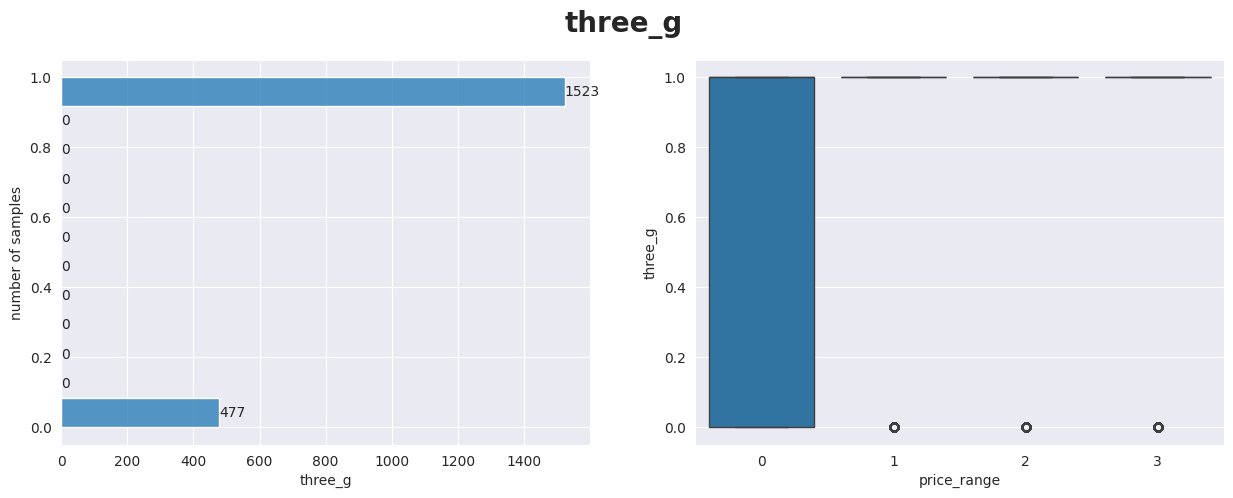

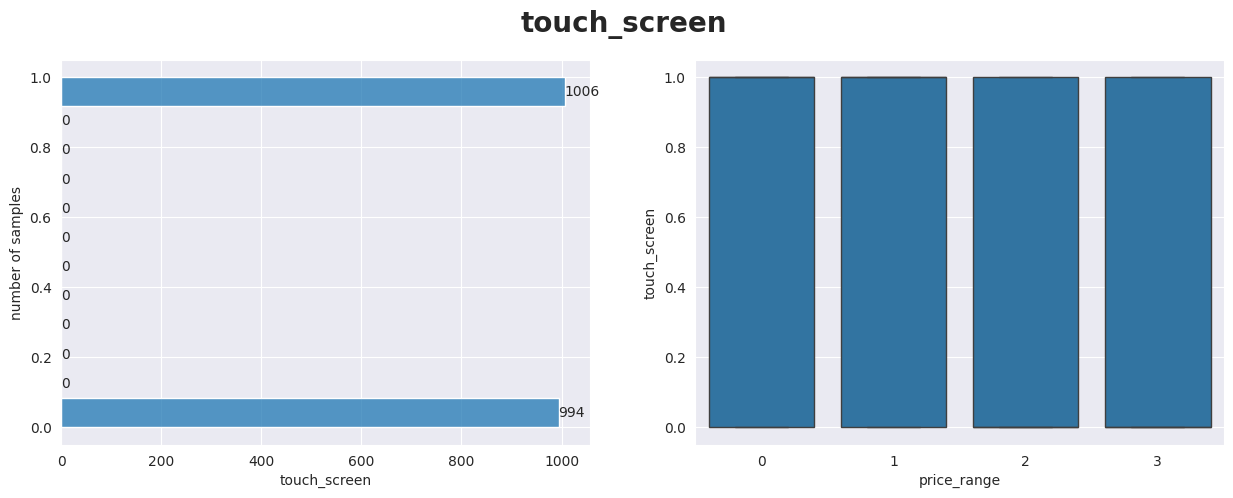

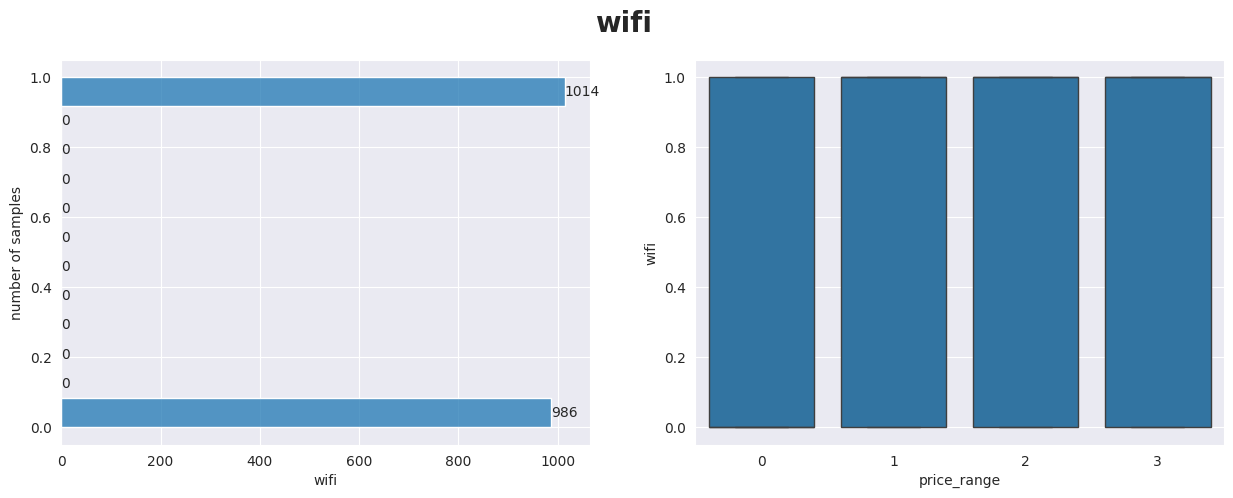

In [74]:
for col in Train.columns[:-1] :
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(col, fontsize=20, fontweight='bold')
    # Left Ax
    ax0 = sns.histplot(y=col, data=Train, ax=ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')
    # Right Ax
    ax1 = sns.boxplot(x='price_range', y=col, data=Train, ax=ax[1])

1. Battery Power
Range: [501, 1998]

Observations:
No noise in the data.
Values are evenly distributed within the range.





2. Bluetooth (blue)
Type: Binary feature.


Observations:
No noise.
50.5% (1010 samples) don't have Bluetooth.
49.5% (990 samples) have Bluetooth.


3. Clock Speed
Range: [0.5, 3]

Observations:
No noise.
Distribution across price groups is similar.
Maximum frequency: 413 samples with a value of 0.
Minimum frequency: 28 samples with a value of 3.
Other samples: Values between (0.5, 3) occur in the range [51, 85].



4. Dual SIM (dual_sim)
Type: Binary feature.


Observations:
No noise.
49.1% (981 samples) don't have Dual SIM.
51.0% (1019 samples) have Dual SIM.



5. Front Camera
Range: [0, 19]


Observations:
No noise.
Distribution across price groups is similar.
474 samples have no front camera.
The distribution decreases as the front camera value increases.
Median front camera value for each price group is approximately 3.




6. 4G
Type: Binary feature.


Observations:
No noise.
47.9% (957 samples) don't have 4G.
52.1% (1043 samples) have 4G.



7. Internal Memory
Range: [2, 64]



Observations:
No noise.
Distribution across price groups is similar.
Most common value: 27 (47 samples).
Normal contributions in each price range group.



8. Mobile Depth
Range: [0.1, 1]


Observations:
No noise.
Distribution across price groups is similar.
Most common value: 0.1 (320 samples).
Normal contributions in each price range group.


9. Mobile Weight
Range: [80, 200]


Observations:
No noise.
Distribution across price groups is similar.
Most common value: 183 (28 samples).
Normal contributions in each price range group.


10. Number of CPU Cores
Range: [1, 8]


Observations:
No noise.
Maximum frequency: 4 cores (274 samples, 13.7%).
Minimum frequency: 6 cores (230 samples, 11.5%).



11. Main Camera
Range: [1, 20]


Observations:
No noise.
Maximum frequency: Value 5 (59 samples).
Minimum frequency: Value 10 (122 samples).



12. Pixel Height
Range: [0, 1960]


Observations:
No noise.
Distribution across price groups is similar.
Normal contributions in each price range group.


13. Pixel Width
Range: [500, 1998]



Observations:
No noise.
Distribution across price groups is similar.
Normal contributions in each price range group.


14. RAM
Range: [256, 3998]


Observations:
No noise.
RAM range corresponds to price ranges:
[256, 1974] → Price Range 0 (500 samples).
[387, 2811] → Price Range 1 (500 samples).
[1185, 3916] → Price Range 2 (500 samples).
[2259, 3998] → Price Range 3 (500 samples).



15. Screen Height
Range: [5, 19]


Observations:
No noise.
Maximum frequency: Value 17 (193 samples, 9.7%).
Minimum frequency: Value 5 (97 samples, 4.9%).


16. Screen Width
Range: [0, 18]


Observations:
No noise.
Maximum frequency: Value 1 (210 samples, 10.5%).
Minimum frequency: Value 18 (8 samples).


17. Talk Time
Range: [2, 20]


Observations:
No noise.
Maximum frequency: Value 7 (124 samples, 6.2%).
Minimum frequency: Value 5 (93 samples, 4.7%).


18. 3G
Type: Binary feature.


Observations:
No noise.
76.2% (1523 samples) have 3G.
23.8% (447 samples) don't have 3G.


19. Touch Screen
Type: Binary feature.


Observations:
No noise.
50.3% (1006 samples) have a touchscreen.
49.7% (994 samples) don't have a touchscreen.




20. WiFi
Type: Binary feature.


Observations:
No noise.
50.7% (1014 samples) have WiFi.
49.3% (986 samples) don't have WiFi.

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


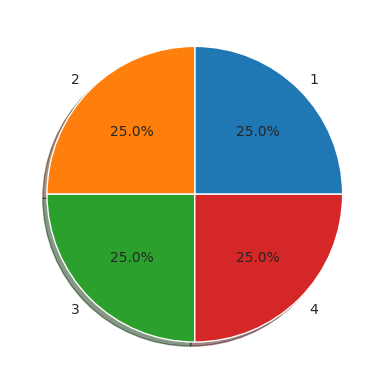

In [75]:
print(Train.price_range.value_counts())


d = Train[['price_range']]
d = d.groupby('price_range').size()
labels = ['1', '2', '3', '4']
# explode = (0, 0.1)
plt.pie(d, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

The output shows the value counts for the price_range column, confirming an even distribution across the categories:

Each price range (1, 2, 3, 4) contains 250 samples.

correlation analysis and visualizes it using a heatmap

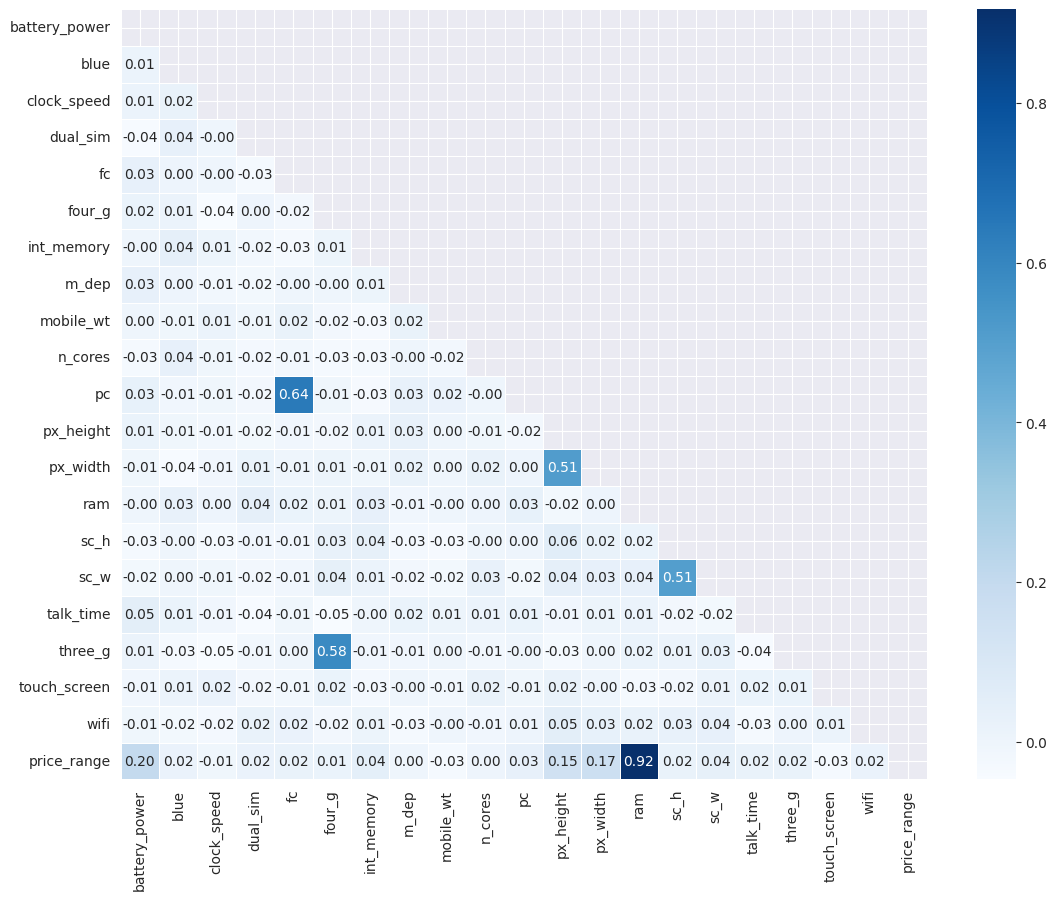

In [76]:
corr = Train.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

most coorelations with price : ram ----> 0.92
suggests that RAM is a strong predictor of price range in your dataset.



Preprocessing

Gradient Boosting Performance:
Accuracy: 0.905

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400


Confusion Matrix:
 [[100   5   0   0]
 [  4  81   6   0]
 [  0   5  80   7]
 [  0   0  11 101]]


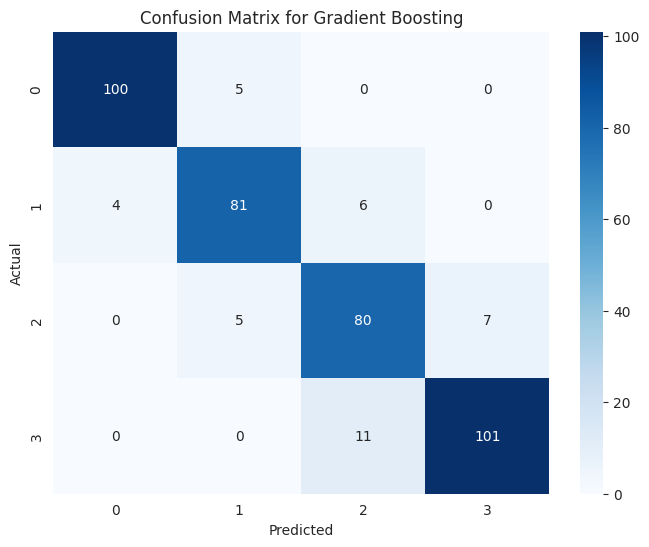

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert one-hot encoded target back to class labels for Gradient Boosting
y_train_gb = np.argmax(y_train, axis=1)  # Convert y_train to 1D array
y_test_gb = np.argmax(y_test, axis=1)    # Convert y_test to 1D array

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train_gb)

# Predict on the test set
gb_pred = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test_gb, gb_pred))
print("\nClassification Report:\n", classification_report(y_test_gb, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_gb, gb_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_gb, gb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3581 - loss: 1.2996 - val_accuracy: 0.6062 - val_loss: 0.7995 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7038 - loss: 0.6600 - val_accuracy: 0.8875 - val_loss: 0.3052 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8706 - loss: 0.3411 - val_accuracy: 0.9000 - val_loss: 0.2207 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8805 - loss: 0.3071 - val_accuracy: 0.8625 - val_loss: 0.2908 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9289 - loss: 0.1914 - val_accuracy: 0.9125 - val_loss: 0.2300 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9230 - loss: 0.1841 - val_accuracy: 0.9250 - val_loss: 0.1965 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9482 - loss: 0.1386 - val_ac

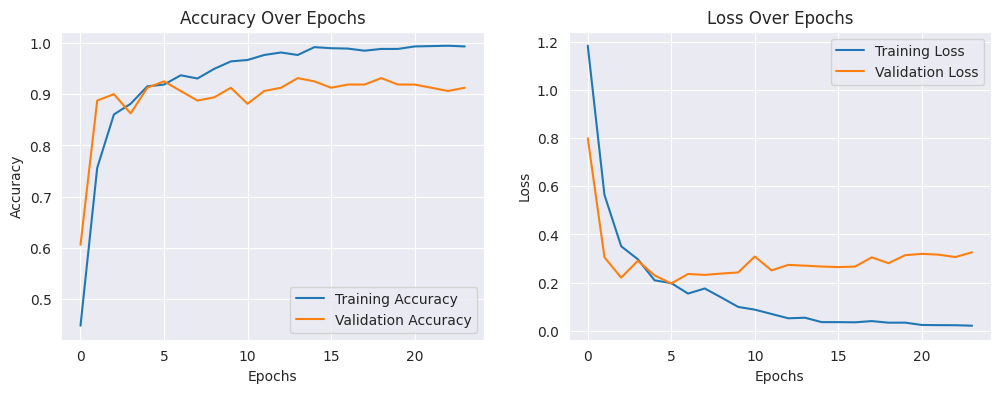

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       105
           1       0.85      0.91      0.88        91
           2       0.87      0.89      0.88        92
           3       0.96      0.94      0.95       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400


Confusion Matrix:
 [[ 96   9   0   0]
 [  3  83   5   0]
 [  0   6  82   4]
 [  0   0   7 105]]


In [79]:
import numpy as np
from tensorflow.keras import models, layers, optimizers, callbacks
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the data (assuming Train dataset is already loaded)
X = Train.drop(columns=['price_range']).values  # Features
y = Train['price_range'].values                 # Target

# Convert target to one-hot encoding
y = to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# FNN Model Architecture
model = models.Sequential()

# Input Layer
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden Layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(4, activation='softmax'))  # 4 classes for price_range

# Compile the model with advanced optimizer settings
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add callbacks to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predictions and Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_test_classes, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fully Connected Neural Network (FNN) Performance:
Accuracy: 0.9150

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       105
           1       0.85      0.91      0.88        91
           2       0.87      0.89      0.88        92
           3       0.96      0.94      0.95       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400


Confusion Matrix:
 [[ 96   9   0   0]
 [  3  83   5   0]
 [  0   6  82   4]
 [  0   0   7 105]]

Gradient Boosting Performance:
Accuracy: 0.9050

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92  

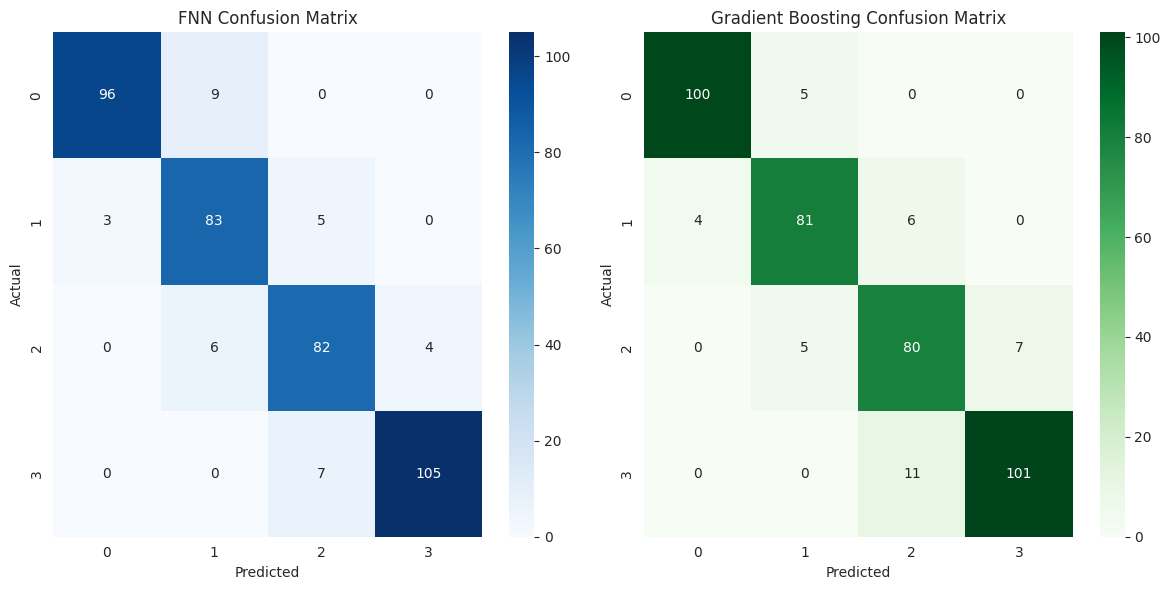

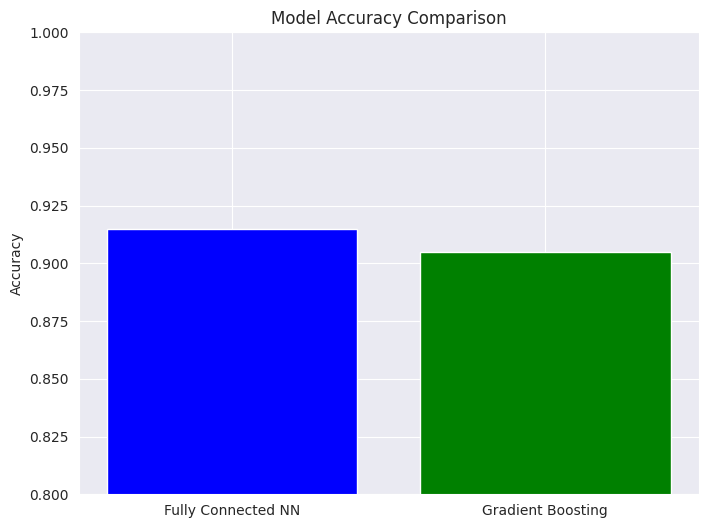

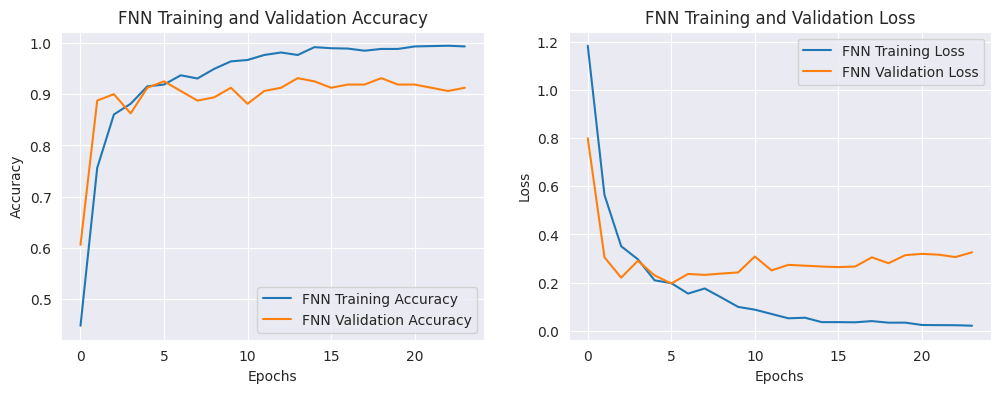

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# ------------------ FNN Predictions and Evaluation ------------------

# Predict on the test set using FNN
fnn_pred = np.argmax(model.predict(X_test), axis=1)  # Predicted classes from FNN
fnn_true = np.argmax(y_test, axis=1)  # True classes from one-hot encoded test set

# Evaluate FNN
fnn_accuracy = accuracy_score(fnn_true, fnn_pred)
print("Fully Connected Neural Network (FNN) Performance:")
print(f"Accuracy: {fnn_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(fnn_true, fnn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(fnn_true, fnn_pred))

# ------------------ Gradient Boosting Predictions and Evaluation ------------------

# Predict on the test set using Gradient Boosting
gb_pred = gb_model.predict(X_test)  # Predicted classes from Gradient Boosting

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test_gb, gb_pred)
print("\nGradient Boosting Performance:")
print(f"Accuracy: {gb_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_gb, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_gb, gb_pred))

# ------------------ Visualization of Confusion Matrices ------------------

plt.figure(figsize=(12, 6))

# Confusion Matrix for FNN
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(fnn_true, fnn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('FNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix for Gradient Boosting
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test_gb, gb_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ------------------ Accuracy Comparison ------------------

# Bar Chart for Accuracy Comparison
models = ['Fully Connected NN', 'Gradient Boosting']
accuracies = [fnn_accuracy, gb_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0.8, 1.0)  # Adjust range based on accuracy values
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# ------------------ Training History Visualization (FNN Only) ------------------

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='FNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='FNN Validation Accuracy')
plt.title('FNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='FNN Training Loss')
plt.plot(history.history['val_loss'], label='FNN Validation Loss')
plt.title('FNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Next Steps
Analyze Misclassifications:
Use confusion matrices to identify which classes are challenging for each model.
Refinements:
Fine-tune FNN architecture or Gradient Boosting hyperparameters to improve accuracy further.
Ensemble Learning:
Combine predictions from FNN and Gradient Boosting using ensemble techniques (e.g., stacking, voting)